In [1]:
import operator
import random
import math
import time

import numpy as np

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
from IPython.display import clear_output

In [2]:
#@title Setup Fitness Criteria
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", np.ndarray, fitness=creator.FitnessMax, speed=list,
    smin=None, smax=None, best=None)


In [3]:
#@title PSO Functions
def generate(size, pmin, pmax, smin, smax):
  part = creator.Particle(np.random.uniform(pmin, pmax, size))
  part.speed = np.random.uniform(smin, smax, size)
  part.smin = smin
  part.smax = smax
  return part

def updateParticle(part, best, phi1, phi2):
  u1 = np.random.uniform(0, phi1, len(part))
  u2 = np.random.uniform(0, phi2, len(part))
  v_u1 = u1 * (part.best - part)
  v_u2 = u2 * (best - part)
  part.speed += v_u1 + v_u2
  for i, speed in enumerate(part.speed):
    if abs(speed) < part.smin:
      part.speed[i] = math.copysign(part.smin, speed)
    elif abs(speed) > part.smax:
      part.speed[i] = math.copysign(part.smax, speed)
  part += part.speed

In [4]:
#@title Evaluation Function
distance = 575 #@param {type:"slider", min:10, max:1000, step:5}
def evaluate(individual):
  v = individual[0] if individual[0] > 0 else 0  #velocity
  a = individual[1] * math.pi / 180  #angle to radians
  return ((2*v**2 * math.sin(a) * math.cos(a))/9.8 - distance)**2,

In [5]:
#@title Add Functions to Toolbox
toolbox = base.Toolbox()
toolbox.register("particle",
                 generate, size=2, pmin=-6, pmax=6, smin=-3, smax=3)
toolbox.register("population",
                 tools.initRepeat, list, toolbox.particle)
toolbox.register("update",
                 updateParticle, phi1=200, phi2=200)
toolbox.register("evaluate", evaluate)

In [6]:
#@title Code to Plot the Expression Tree
import matplotlib.pyplot as plt

def plot_population(pop):
  xs = [x for x,_ in pop]
  ys = [y for _,y in pop]
  plt.scatter(xs,ys)
  plt.show()

[75.37042873 41.36550401]


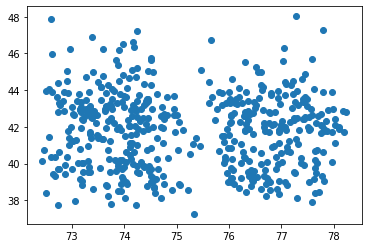

99 	500  	-626.534	512.782	-2418.67	-0.496032 


In [7]:
#@title Run the Evolution
random.seed(64)

pop = toolbox.population(n=500)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

GEN = 100
best = None

for g in range(GEN):
  for part in pop:
    part.fitness.values = tuple(np.subtract((0,), toolbox.evaluate(part)))
    if part.best is None or part.best.fitness < part.fitness:
      part.best = creator.Particle(part)
      part.best.fitness.values = part.fitness.values
    if best is None or best.fitness < part.fitness:
      best = creator.Particle(part)
      best.fitness.values = part.fitness.values
  for part in pop:
    toolbox.update(part, best)

  if (g+1) % 10 == 0:
    logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
    clear_output()
    print(best)
    plot_population(pop)
    print(logbook.stream)
    time.sleep(1)

In [8]:
v, a = best
a = a * math.pi / 180  #angle to radians
distance = (2*v**2 * math.sin(a) * math.cos(a))/9.8
print(distance)

575.0047031186579
